# TP 1: Réduction de dimensionnalité


Ce notebook est écrit à l'aide de l'environement Jupyter, qui permet de taper dans un même document des cellules de code, du texte au format markdown, et d'afficher les sorties Python dans le corps du document. Le désavantage par rapport à un environnement de code comme RStudio ou Spyder est l'absence d'un explorateur des variables. Ceci se corrige en lançant *Anaconda prompt* et en entrant les lignes suivantes:

pip install jupyter_contrib_nbextensions

jupyter contrib nbextension install --user

En relançant Jupyter, un onglet extensions est ajouté où vous pouvez choisir celles que vous souhaitez, notamment le *variable inspector*.



## Partie 1: Analyse en composantes principales


### 1.1 Préparation des données

Dans cette partie, nous allons travailler sur la base de données Worldwide Governance Indicators que vous trouverez sur ARCHE.

Commencez par télécharger le fichier de données wgidataset.dta ainsi que le fichier WGIReadme.pdf qui l'accompagne.

A la lecture du *readme*, répondez aux questions suivantes:

* 1) Quelle est la source des données? Est-ce une source fiable?
* 2) Quelles sont les variables contenues dans la base? Sous quelle forme se présentent-elles?

Nous allons importer les données dans Python à l'aide du package *pandas*. Comme la base est enregistrée en local, nous allons avoir également besoin du package *os* qui permet de naviguer dans les dossiers de votre ordinateur.

Dans la cellule de code ci-dessous, importez les packages requis. Comme il est nécessaire d'écrire le nom complet d'un package à chaque fois qu'on utilise une de ses fonctions, il est fréquent de les renommer en les important. Importez *pandas* et nommez le *pd*.

In [ ]:
import pandas as pd

Pour importer un fichier de données enregistré en local, il faut préciser à Python le chemin du dossier où se trouve le fichier. Vous le trouverez à l'aide de l'explorateur de fichiers ou dans les propriétés du fichier.

Le package *os* permet de renseigner le chemin d'accès d'un dossier à l'aide de la fonction *chdir()*. Lorsqu'on utilise une fonction d'un package, il faut l'écrire au format package.fonction: ici *os.chdir*.

Pour savoir quels sont les arguments de la fonction et leurs types, tapez "os.chdir?" dans la console ou dans une cellule Jupyter. Complétez ensuite le code ci-dessous.

Il existe de nombreux formats pour enregistrer une base de données: xls, xlsx, csv, txt, etc.

La WGI est enregistrée au format .dta qui est celui utilisé par Stata.

Pandas permet d'importer presque tous les formats de données en utilisant les fonctions dédiées: read_csv, read_excel, read_json, etc. Pour lire des données en .dta, nous allons utiliser la fonction *read_stata*. Dans la cellule ci-dessous, importez la base dans une variable appelée *data_raw*.

In [2]:
import os
import pandas as pd

data_raw = pd.read_stata('/content/wgidataset.dta')

Pour voir l'allure des données ou obtenir des statistiques descriptives, *pandas* propose de nombreuses fonctions utiles:

* count: compte le nombre de données renseignées par variable
* head: affiche les premières lignes de la base
* info: donne le nombre de données renseignées et le type de chaque variable
* describe: donne des statistiques descriptives sur chaque variable
* mean: donne la moyenne de chaque variable

Utilisez ces fonctions pour explorer la base et répondez aux questions suivantes:

* 3) Combien y a-t-il de données manquantes pour la variable 'pve'?
* 4) Y a-t-il de potentiels outliers? Quel traitement préalable devons-nous appliquer aux données?

In [3]:
data_raw.head()
data_raw.info()
data_raw.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136 entries, 0 to 5135
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         5136 non-null   object 
 1   countryname  5136 non-null   object 
 2   year         5136 non-null   int16  
 3   vae          4975 non-null   float32
 4   vas          4975 non-null   float32
 5   van          4975 non-null   float32
 6   var          4975 non-null   float32
 7   val          4975 non-null   float32
 8   vau          4975 non-null   float32
 9   pve          4966 non-null   float32
 10  pvs          4966 non-null   float32
 11  pvn          4966 non-null   float32
 12  pvr          4966 non-null   float32
 13  pvl          4966 non-null   float32
 14  pvu          4966 non-null   float32
 15  gee          4906 non-null   float32
 16  ges          4906 non-null   float32
 17  gen          4906 non-null   float32
 18  ger          4906 non-null   float32
 19  gel   

,0
code,5136
countryname,5136
year,5136
vae,4975
vas,4975
van,4975
var,4975
val,4975
vau,4975
pve,4966


In [4]:
data_raw.describe()

,year,vae,vas,van,var,val,vau,pve,pvs,pvn,...,rln,rlr,rll,rlu,cce,ccs,ccn,ccr,ccl,ccu
count,5136.000000,4.975000e+03,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4.966000e+03,4966.000000,4966.000000,...,5020.000000,5020.000000,5020.000000,5020.000000,4.930000e+03,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000
mean,2010.250000,-6.134186e-09,0.172764,9.377286,50.016220,41.599026,57.756149,6.145304e-09,0.280484,5.436770,...,9.369721,50.051399,40.113216,59.032780,-6.190178e-09,0.209076,7.997160,50.056492,39.700386,59.409843
std,7.339254,9.976857e-01,0.078683,4.420243,29.027184,26.733833,30.570936,9.976806e-01,0.079813,2.249111,...,4.388208,29.057875,28.393736,28.741951,9.976633e-01,0.095448,4.137128,29.072926,29.738646,27.158895
min,1996.000000,-2.313395e+00,0.102437,1.000000,0.000000,0.000000,0.966184,-3.312951e+00,0.192247,1.000000,...,1.000000,0.000000,0.000000,0.000000,-1.936706e+00,0.114062,1.000000,0.000000,0.000000,1.904762
25%,2004.750000,-8.227686e-01,0.126784,6.000000,24.882629,16.988518,30.529152,-6.416756e-01,0.228971,4.000000,...,6.000000,24.880383,14.084507,36.190475,-7.778569e-01,0.148438,4.000000,24.867725,12.857142,38.095238
50%,2010.500000,5.206023e-02,0.143137,10.000000,50.000000,40.500000,57.211540,1.102292e-01,0.251998,6.000000,...,10.000000,50.000000,38.308456,58.173077,-2.192599e-01,0.173595,8.000000,50.000000,35.109055,59.344215
75%,2016.250000,9.094490e-01,0.202216,13.000000,75.120872,64.563110,88.591400,8.490784e-01,0.310351,7.000000,...,13.000000,75.947937,61.971832,86.255920,7.377204e-01,0.232849,11.000000,75.478500,63.809525,83.392578
max,2022.000000,1.800992e+00,0.893413,20.000000,100.000000,97.584541,100.000000,1.964211e+00,0.723481,10.000000,...,18.000000,100.000000,97.142860,100.000000,2.459118e+00,1.059560,16.000000,100.000000,98.584908,100.000000


In [5]:
data_raw.isnull().sum()

,0
code,0
countryname,0
year,0
vae,161
vas,161
van,161
var,161
val,161
vau,161
pve,170


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

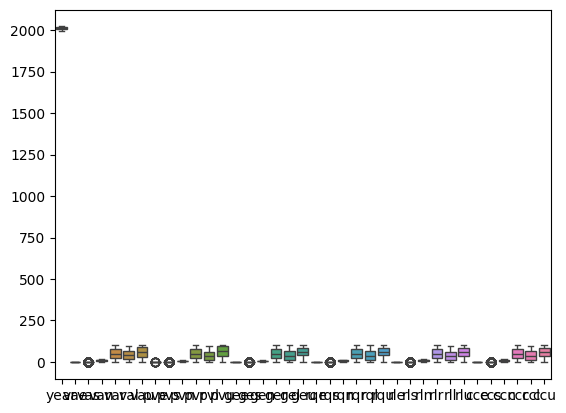

In [7]:
import seaborn as sns
sns.boxplot(data_raw)

La plupart des variables de la base ne nous intéressent pas directement. A partir du fichier *readme*, sélectionnez les principaux indicateurs.

Plutôt que de retirer les variables inutiles de la base, il est préférable de créer une nouvelle base en ne gardant que les variables qui nous intéressent. Créez une nouvelle base intitulée *data* contenant les variables sélectionnées.

Vérifiez que la base *data* contient bien les données souhaitées à l'aide de la fonction *head*.

In [15]:
data=data_raw[["code","countryname", "year", "vae", "pve", "gee", "rqe", "rle", "cce"]]

La base contient des données de panel, observées par pays et par année. On peut ainsi voir l'évolution des indicateurs au cours du temps. Choisissez un pays et créez une nouvelle base *df_pays* contenant les données de ce seul pays.

Il y a trois méthodes pour le faire:
* data[(data.countryname=='France')]
* data.loc[(data.countryname=='France')]
* data.query('countryname'=='France')

Toutes produisent le même résultat.

In [16]:
df_france=data[(data.countryname=="France")]

In [17]:
df_france.describe()

,year,vae,pve,gee,rqe,rle,cce
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2010.250000,1.211532,0.437743,1.445647,1.157976,1.390233,1.329484
std,7.496376,0.102456,0.261889,0.154844,0.131349,0.083989,0.102518
min,1996.000000,1.065646,-0.106350,1.165807,0.825751,1.182720,1.122349
25%,2004.750000,1.148437,0.278530,1.364608,1.105373,1.361322,1.256729
50%,2010.500000,1.192922,0.424234,1.436650,1.172497,1.405084,1.308460
75%,2016.250000,1.248343,0.597378,1.551570,1.232735,1.447716,1.403768
max,2022.000000,1.476771,0.924183,1.755630,1.431538,1.499732,1.537773


Pour visualiser l'évolution des indicateurs au cours de la période 1996-2022, on souhaite tracer un graphique. Pour cela, nous avons besoin de la fonction *pyplot* du package *matplotlib*. On importe une fonction donnée avec la syntaxe PACKAGE.FONCTION

Dans la cellule ci-dessous, importez *pyplot* et renommez-la "plt"

In [13]:
import matplotlib.pyplot as plt

Pour réaliser une graphique d'un des indicateurs, on utilise la fonction *plot*. Lisez l'aide de la fonction puis tracez un indicateur en fonction de l'année dans la cellule ci-dessous.

In [24]:
plt.plot?

Dans Jupyter, les graphiques s'affichent automatiquement sous la cellule mais en général, il faut préciser à Python de le faire avec la commande *plt.show()*.

On peut essayer de rendre le graphique un peu plus élégant, en ajoutant par exemple des noms aux axes, en changeant la couleur de la courbe, etc. On peut également faire figurer sur le même graphe plusieurs séries en les renseignant les unes à la suite des autres dans la fonction *plot* sous la forme *x,y,couleur,label*. Par exemple plt.plot(x, y1, 'b', label='y1, x, y2, 'g', label='y2') affichera y1 en fonction de x en bleu et y2 en fonction de x en vert.

Lorsqu'on met une légende, il faut demander à Python de la faire figurer avec la fonction *legend*.


Si on veut représenter beaucoup de variables, cette syntaxe n'est pas pratique. Plus simplement, on peut utiliser plusieurs fois la fonction *plot* successivement.

On peut également ajouter un titre avec la fonction *title*.


Dans la cellule ci-dessous, tracez trois indicateurs de votre choix dans des couleurs différentes, ajoutez un titre, légendez les courbes et ajoutez une légende à l'axe des abscisses avec la fonction *xlabel*.

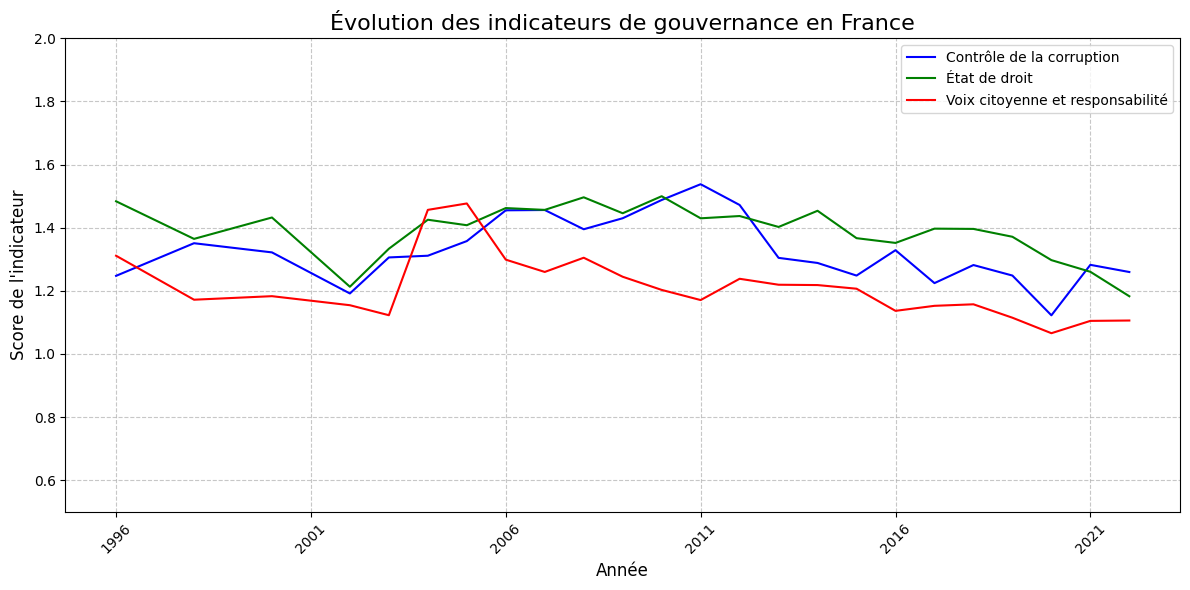

In [25]:
import matplotlib.pyplot as plt

# Tracer les trois indicateurs
plt.figure(figsize=(12, 6))  # Augmenter la taille du graphique pour une meilleure lisibilité

plt.plot(df_france["year"], df_france["cce"], 'b-', label="Contrôle de la corruption")
plt.plot(df_france["year"], df_france["rle"], 'g-', label="État de droit")
plt.plot(df_france["year"], df_france["vae"], 'r-', label="Voix citoyenne et responsabilité")  # Ajout d'un troisième indicateur

# Personnalisation du graphique
plt.title("Évolution des indicateurs de gouvernance en France", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Score de l'indicateur", fontsize=12)

plt.legend(loc='best')  # Placer la légende au meilleur endroit
plt.grid(True, linestyle='--', alpha=0.7)  # Ajouter une grille pour faciliter la lecture

# Ajuster les limites de l'axe y pour mieux voir les variations
plt.ylim(0.5, 2)  # Ajustez ces valeurs selon vos données

# Ajouter des marques sur l'axe x tous les 5 ans
plt.xticks(range(df_france["year"].min(), df_france["year"].max()+1, 5), rotation=45)

plt.tight_layout()  # Ajuster automatiquement la mise en page
plt.show()


* 5) Commentez brièvement le graphique obtenu.

On revient désormais à la base de données *data*. Pour analyser les liens entre les variables, on se propose d'utiliser l'analyse en composantes principales. Avant de pouvoir le faire, il va falloir filtrer un peu plus les données.

* 6) Quels types de données peuvent être traités par une ACP? Quelles variables faut-il retirer?

* 7) Dans la structure des données, qu'est-ce qui peut perturber le calcul d'une ACP? Comment filtrer les données correctement?

En Python, la plupart des objets (vecteurs, bases, listes, etc) disposent de fonctions précodées appelées "méthodes". On les utilise via la syntaxe OBJET.METHODE. Par exemple, pour retirer des colonnes à une base de données nommée *data*, on écrit data.drop([], axis=1) en renseignant dans les crochets les colonnes à retirer. L'argument "axis=1" signifie qu'on supprime des colonnes. Pour supprimer des lignes, on écrirait "axis=0".

Dans la cellule ci-dessous, créez une nouvelle base de données *df_acp* en filtrant la base *data* selon votre réponse à la question 7, puis retirez les colonnes identifiées à la question 6 à l'aide de la méthode *drop*.

In [26]:
df_acp=data[(data.year==2022)]
df_acp.head()

,code,countryname,year,vae,pve,gee,rqe,rle,cce
23,ABW,Aruba,2022,1.009182,1.474684,1.105333,0.967043,1.278908,0.756785
47,ADO,Andorra,2022,1.102833,1.587736,1.495305,1.398334,1.485450,1.270204
71,AFG,Afghanistan,2022,-1.751587,-2.550802,-1.879552,-1.271806,-1.658442,-1.183776
95,AGO,Angola,2022,-0.797131,-0.646241,-1.040429,-0.606699,-1.021905,-0.601941
119,AIA,Anguilla,2022,NaN,1.128859,1.219509,0.972117,0.428122,1.270204


Une dernière chose à faire: vérifier qu'il n'y a pas de données manquantes. Vérifiez si c'est bien le cas dans la cellule ci-dessous et, au besoin, retirer les observations incomplètes en appliquant à la base *df_acp* la méthode *dropna()*. Pour s'épargner du temps, on peut aussi utiliser *dropna()* préventivement: s'il n'y a pas de données manquantes, ça ne changera pas la base.

In [27]:
df_acp=df_acp.dropna()
df_acp=df_acp.drop(["code","countryname","year"],axis=1)
df_acp.head()

,vae,pve,gee,rqe,rle,cce
23,1.009182,1.474684,1.105333,0.967043,1.278908,0.756785
47,1.102833,1.587736,1.495305,1.398334,1.485450,1.270204
71,-1.751587,-2.550802,-1.879552,-1.271806,-1.658442,-1.183776
95,-0.797131,-0.646241,-1.040429,-0.606699,-1.021905,-0.601941
143,0.139466,0.114945,0.065063,0.159354,-0.165779,-0.407876


### 1.2 Calcul de l'ACP


Nous sommes désormais prêts à calculer une ACP sur la base *df_acp*. Le calcul nécessite d'utiliser plusieurs sous-fonctions du package *sklearn*. Nous aurons besoin de la sous-fonction PCA contenue dans la fonction *decomposition* et de la sous-fonction scale contenue dans la fonction *preprocessing* si jamais on souhaite centrer et réduire les variables. Il nous faudra aussi le package *numpy*, renommé np, qui permet de faire des calculs matriciels. Nous allons importer au passage le package *seaborn* en le renommant sb qui nous permettra de réaliser des sorties graphiques de meilleure qualité.

* 8) Avons-nous besoin de centrer et réduire les données?

Dans la cellule ci-dessous, importez les fonctions nécessaires.

In [28]:
import seaborn as sb
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

*Seaborn* permet d'obtenir des rendus graphiques plus propres que *matplotlib* et dispose de fonctions utiles. La fonction pairplot permet d'obtenir la matrice des scatterplots pour chaque paire de variables. Essayez-la dans la cellule ci-dessous.

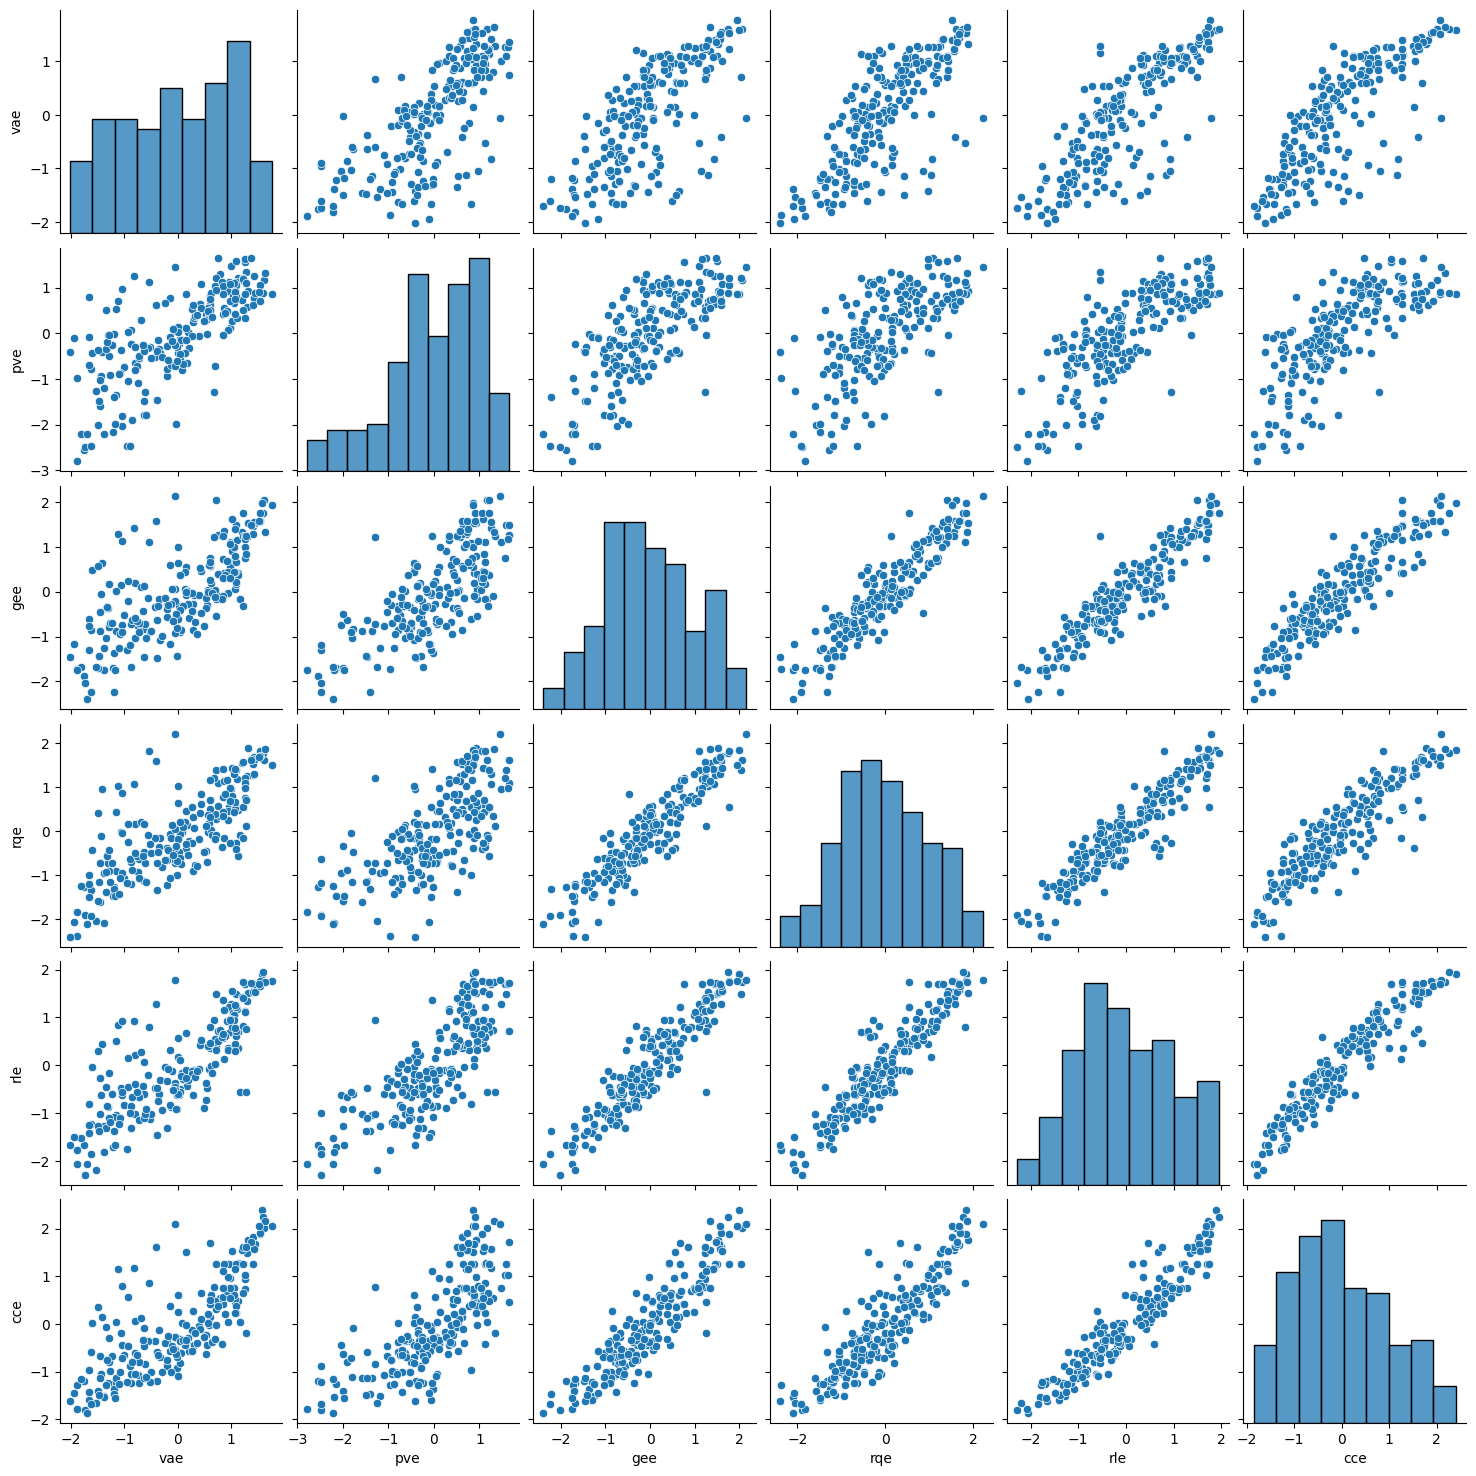

In [29]:
sb.pairplot(df_acp)

* 9) Que remarquez-vous sur le graphique?

Pour vérifier, nous pouvons calculer la matrice des coefficients de corrélation de Pearson d'une base à l'aide de la méthode *corr*. Dans la cellule ci-dessous, appliquez la méthode *corr* à la base *df_acp*.

<Axes: >

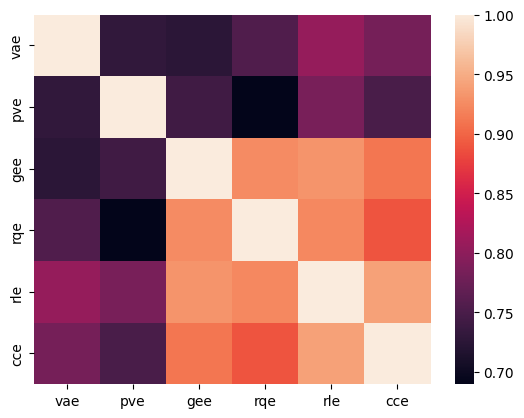

In [30]:
sb.heatmap(df_acp.corr())

Pour mieux visualiser, on peut utiliser la fonction heatmap de *seaborn*, qui permet de colorier les entrées d'une matrice avec une coleur dépendant de leur valeur. Dans la cellule ci-dessous, tracez une heatmap du vecteur des corrélations.

<Axes: >

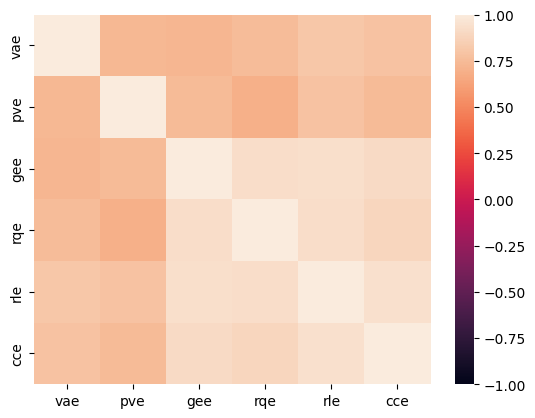

In [33]:
sb.heatmap(df_acp.corr(), vmin=-1)

Pas mal, mais ce n'est pas très clair car l'échelle est ajusté aux valeurs observées. Refaites le même graphe mais en précisant dans la fonction heatmap les arguments suivants: vmin=-1, annot=True

Cela indique à Seaborn que la valeur minimale de la série est -1 et lui demande de renseigner la valeur de chaque entrée.

<Axes: >

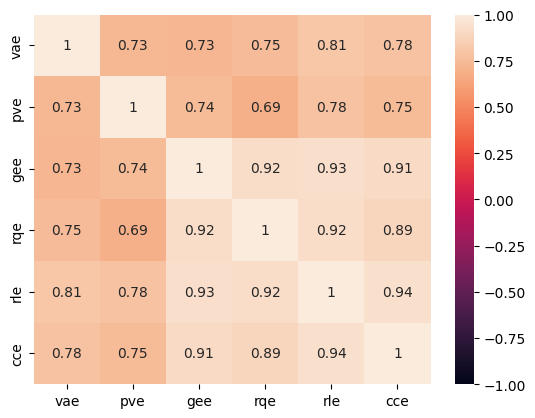

In [34]:
sb.heatmap(df_acp.corr(), vmin=-1, annot=True)

* 10) Au vu de ce graphique, à quoi pouvons-nous nous attendre dans les résultats de l'ACP?
### ***On peut s'attendre à avoir un effet de taille cad lorsque tous les variables se dirigent vers une meme direction ou vers le meme coté ( Droit ou gauche ). **


Nous pouvons passer au calcul de l'ACP. En utilisant ScikitLearn, celui-ci se fait en deux étapes:
* On définit une variable qui va contenir le modèle à estimer avec la fonction sklearn adéquate, ici PCA(). Lors de cette étape, on peut renseigner divers arguments dans la fonction PCA, par exemple le nombre d'axes à garder en entrant comme argument n_components=X. Si on ne renseigne rien, la fonction utilise les arguments par défaut qui sont précisés dans la documentation du package.

* On ajuste le modèle sur une base de données via la méthode *fit* en précisant la base à utiliser en argument.

Dans la cellule ci-dessous, créez une variable *pca* contenant le modèle de l'ACP avec la fonction PCA() puis estimez le modèle sur la base *df_acp*.

In [35]:
pca=PCA()
pca.fit(df_acp)

PCA()

Pas de message d'erreur, c'est bon signe! Python a calculé l'ACP sur les données qu'on lui a renseignées et a gardé le résultat dans la variable pca. On utilisera donc cette variable et les différentes méthodes qui lui sont liées pour obtenir les résultats de l'ACP.

En premier lieu, on souhaite voir les valeurs propres qui ont été obtenues. Pour cela, il y a deux méthodes qu'on peut appliquer à la variable pca:
* explained_variance_ nous donne le vecteur des valeurs propres classées par ordre décroissant
* explained_variance_ratio_ nous donne la part d'inertie (décroissante) expliquée par chaque axe

Affichez ces deux vecteurs à l'aide de la fonction *print()*.

In [37]:
print(pca.explained_variance_)

print(pca.explained_variance_ratio_)

[5.125158   0.39926964 0.2754922  0.10807757 0.06308857 0.04785234]
[0.85150534 0.06633556 0.04577089 0.01795625 0.01048168 0.0079503 ]


* 11) Quelle est l'inertie totale du nuage de points? D'après le critère de Kaiser, combien d'axes devrions nous garder?

# **Selon la regle de Kaiser on garde uniquement les axes ou l'axe qui a la valeur propre supérieur à 1 donc ici on prend juste une seule(5.13). **

La fonction *cumsum* du package *numpy* permet d'obtenir les valeurs cumulatives croissantes d'un vecteur. Créez un vecteur exp_var_cumul contenant l'inertie cumulée expliquée par les axes de l'ACP et affichez ce vecteur.

In [39]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

Pour compléter ce qu'indique le critère de Kaiser, on souhaite utiliser le critère du coude. Créez un graphique affichant l'éboulis des valeurs propres ou de la variance expliquée par chaque axe avec matplotlib.

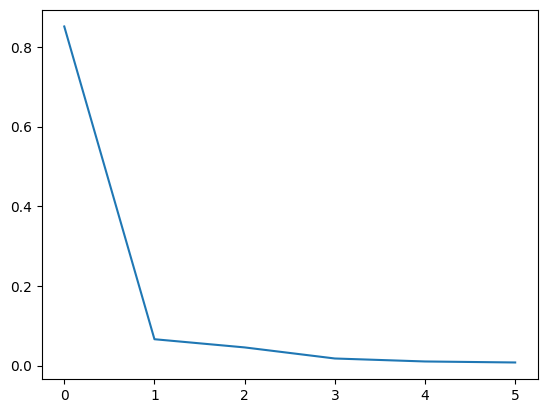

In [40]:
plt.plot(pca.explained_variance_ratio_)

* 12) Selon le critère du coude, combien d'axes garderiez-vous? Quelle serait alors la part d'inertie expliquée?

## **SElon la regle de coude ici on ne peut garder qu'une seule axe alors dans ce cas la part d'inertie expliquée serait de 85.15 % de la variance totale. **



Une fois l'ACP calculée, on peut calculer les coordonnées des variable et des individus dans la nouvelle base. Pour cela, on crée une nouvelle basse de données *dft* en appliquant à l'objet acp la méthode *transform* et en précisant comme argument la base à transformer.

Calculez ci-dessous la base transformée.

In [42]:
dft=pca.transform(df_acp)
print(dft)

[[ 2.7177446   0.42435378 -0.30702808 -0.23861834  0.04562784  0.2547355 ]
 [ 3.444697    0.12913558 -0.3649376  -0.15941879  0.02026958  0.05469114]
 [-4.115735   -1.0328882   0.48797655  0.34500098 -0.39021647 -0.14472264]
 ...
 [-3.8718116  -0.27056864  0.55703574  0.05404042 -0.07875388 -0.02763403]
 [-0.8976525   0.6079392  -0.01965524 -0.06794207 -0.09822383 -0.04152821]
 [-2.8932164   0.23144469 -0.13504264  0.09276187  0.06205323  0.07084195]]


On peut également tout faire d'une seule ligne de commande avec la méthode *fit_transform*.

La base *dft* contient les coordonnées des observations dans la base des composantes principales. ATTENTION: la méthode ne renvoit pas une base au format DataFrame de *pandas* mais un vecteur au format *numpy*.


## 1.3 Interprétation des résultats

On peut désormais s'intéresser à la construction des axes de l'ACP en traçant le cercle des corrélations. Il n'existe pas de code tout fait en Python pour cela, mais on peut facilement définire une fonction qui le fasse. La cellule ci-dessous contient une fonction *plot_correlation_circle* qui permet d'obtenir le cercle des corrélations pour des axes au choix.

In [43]:
def plot_correlation_circle(axe1, axe2, data, label1, label2):
    fig, ax = plt.subplots(figsize=(16, 10))

    for i in range(data.shape[1]):
        x = np.corrcoef(axe1,data[data.columns[i]])[0,1]
        y = np.corrcoef(axe2,data[data.columns[i]])[0,1]
        ax.annotate("", xy= (x,y), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
        ax.annotate(data.columns[i], (x+0.02,y+0.02), size=12)


    ax.set_title('Cercle des corrélations')
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
    plt.axis('equal')
    plt.xlabel(str(label1))
    plt.ylabel(str(label2))
    plt.show()

* 13) Commentez la fonction *plot_correlation_circle*: quels sont ses arguments, que calcule-t-elle, que renvoit-elle?

Utilisez la fonction pour obtenir le cercle des corrélations pour les deux premiers axes.

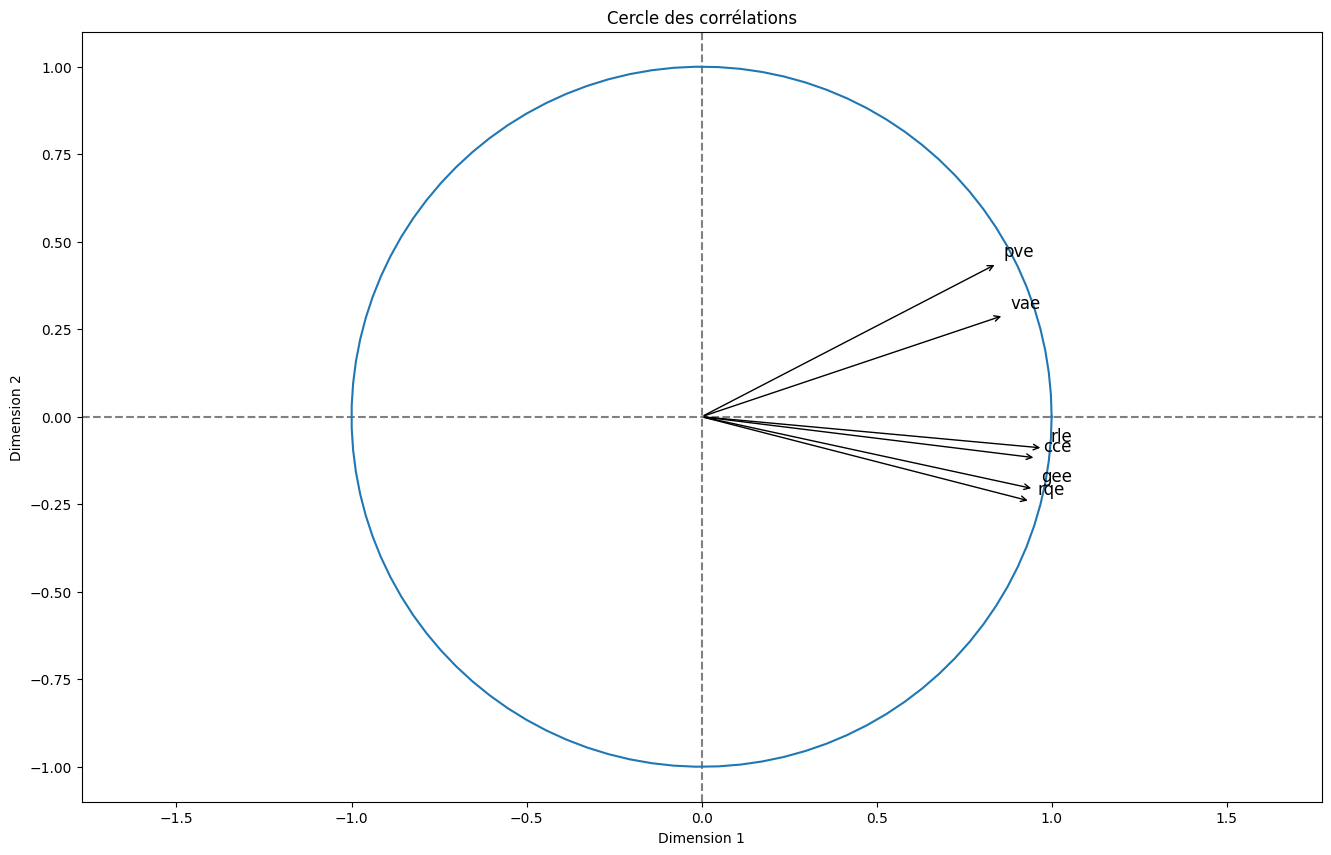

In [45]:
plot_correlation_circle(dft[:,0], dft[:,1], df_acp, "Dimension 1", "Dimension 2")

* 14) Que constate-t-on sur le cercle des corrélations? Pouvait-on s'attendre à ce résultat?

# On constate alors un effet de taille , ce qui ne pas surprenant au vue des corrélations fortes.

* 15) Interprétez les axes de l'ACP: quels types de pays opposent-ils?

Après avoir interprété les axes, il est souhaitable de tracer le scatterplot des pays dans la nouvelle base pour voir s'il corrobore bien les interprétations proposées. Il y a toutefois un problème: les coordonnées des pays dans la nouvelle base sont contenues dans la base *dft* qui ne contient aucune information sur l'identité des observations.

Pour essayer de la retrouver, il va falloir ruser un peu. Commencez par créer une base de données *dft_id* au format DataFrame à partir de la base *dft*. Pour cela, utilisez la fonction *DataFrame* de Pandas. Observez les indices des premières lignes de cette nouvelle base: quel est le problème?

In [46]:
df_acp["dim1"]=dft[:,0]
df_acp["dim2"]=dft[:,1]

df_acp.head()

,vae,pve,gee,rqe,rle,cce,dim1,dim2
23,1.009182,1.474684,1.105333,0.967043,1.278908,0.756785,2.717745,0.424354
47,1.102833,1.587736,1.495305,1.398334,1.485450,1.270204,3.444697,0.129136
71,-1.751587,-2.550802,-1.879552,-1.271806,-1.658442,-1.183776,-4.115735,-1.032888
95,-0.797131,-0.646241,-1.040429,-0.606699,-1.021905,-0.601941,-1.889122,0.002322
143,0.139466,0.114945,0.065063,0.159354,-0.165779,-0.407876,-0.012891,0.150392


Heureusement, la base initiale *df_acp* est toujours disponible: gardez les bases de données intermédiaires!

On peut retrouver pour chaque pays de *df_acp* le nom du pays auquel il correspond dans la base de données originale car les lignes ont gardé leurs indices d'origine! On va donc créer une nouvelle variable "pays" dans *dft_id* qui va aller chercher dans la base *data* le nom du pays correspondant à partir des indices de la base *df_acp*. Lors de l'ajout d'une nouvelle variable dans une base, Pandas match les données par indice, or les observations de *dft_id* ayant des indices différents de *data* et *df_acp*, il faut convertir la nouvelle variable en vecteur *numpy* avant de l'ajouter. Le code ci-dessous permet de le faire en une ligne, mais il est possible de le faire de bien d'autres façons. En Python, il 'y a pas de bonne ou mauvaise façon de faire, l'essentiel est que ça fonctionne!

In [47]:
df_acp["pays"]=data["countryname"]
df_acp["code"]=data["code"]

df_acp.head()

,vae,pve,gee,rqe,rle,cce,dim1,dim2,pays,code
23,1.009182,1.474684,1.105333,0.967043,1.278908,0.756785,2.717745,0.424354,Aruba,ABW
47,1.102833,1.587736,1.495305,1.398334,1.485450,1.270204,3.444697,0.129136,Andorra,ADO
71,-1.751587,-2.550802,-1.879552,-1.271806,-1.658442,-1.183776,-4.115735,-1.032888,Afghanistan,AFG
95,-0.797131,-0.646241,-1.040429,-0.606699,-1.021905,-0.601941,-1.889122,0.002322,Angola,AGO
143,0.139466,0.114945,0.065063,0.159354,-0.165779,-0.407876,-0.012891,0.150392,Albania,ALB


Les noms des pays ont bien été récupérés correctement, nous pouvons donc créer un graphique pour représenter les différents pays dans le plan principal. Avant cela, renommez les deux premières colonnes de *dft_id* en 'dim1' et 'dim2' à l'aide de la méthode rename. Celle-ci prend pour argument columns= un dictionnaire contenant en clés les noms actuels des variables et en valeurs les nouveaux noms. Pour que les noms soient correctement changés dans la base sans avoir à en créer une nouvelle, il faut également précise l'argument inplace=True.

Pour tracer le graphique, utilisez la fonction *plt.scatter()* en renseignant les bons arguments. Ajoutez un titre et un nom aux axes. Enfin, pour afficher les noms, il faut créer une boucle itérant sur les entrées de la base de données et qui, pour chaque itération, va écrire le nom du pays aux coordonnées du point. Les itérations se font donc sur des tuples du type $(dim1,dim2,nom)$. Pour faire une boucle sur des tuples, on utilise la commande zip() qui gère directement les valeurs à itérer. La syntaxe pour construire une boucle sera alors "for i, j, nom in zip(dft_id['dim1'],dft_id['dim2'], dft_id['pays']):"


Pour écrire le nom des pays dans la boucle, utilisez la fonction *plt.text()* qui prend comme arguments l'abscisse, l'ordonnée et une chaîne de caractère à écrire au point renseigné (ici le nom du pays).


Pour tracer des graphiques à partir d'une base de données au format DataFrame de Pandas, vous pouvez également utiliser la méthode *plot* associée aux objets *dataframes*, qui donne à peu près les mêmes résultats.

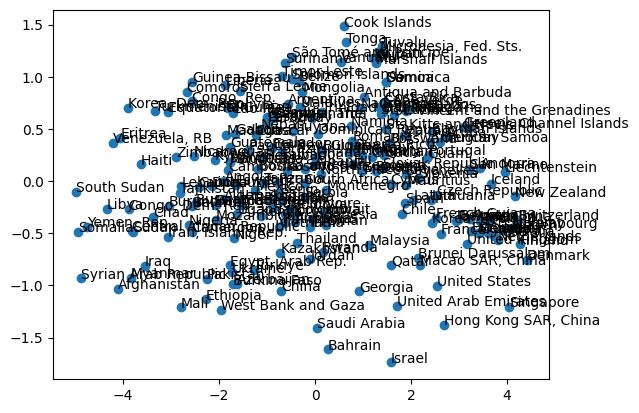

In [48]:
plt.scatter(df_acp["dim1"], df_acp["dim2"])
for i,j,nom in zip(df_acp["dim1"], df_acp["dim2"], df_acp["pays"]):
    plt.text(i,j,nom)

Ce n'est pas très lisible... Pour améliorer ça, nous pouvons:

* augmenter la taille du graphique et sa résolution en la précisant en amont avec la commande plt.rcParams["figure.figsize"] = [20, 15]
* réduire la taille des annotations en précisant dans la commande plt.text l'argument fontsize=
* annoter une partie des observations seulement en filtrant par une condition if --- : dans la boucle for

Essayez dans la cellule ci-dessous d'obtenir une graphique de qualité satisfaisante.

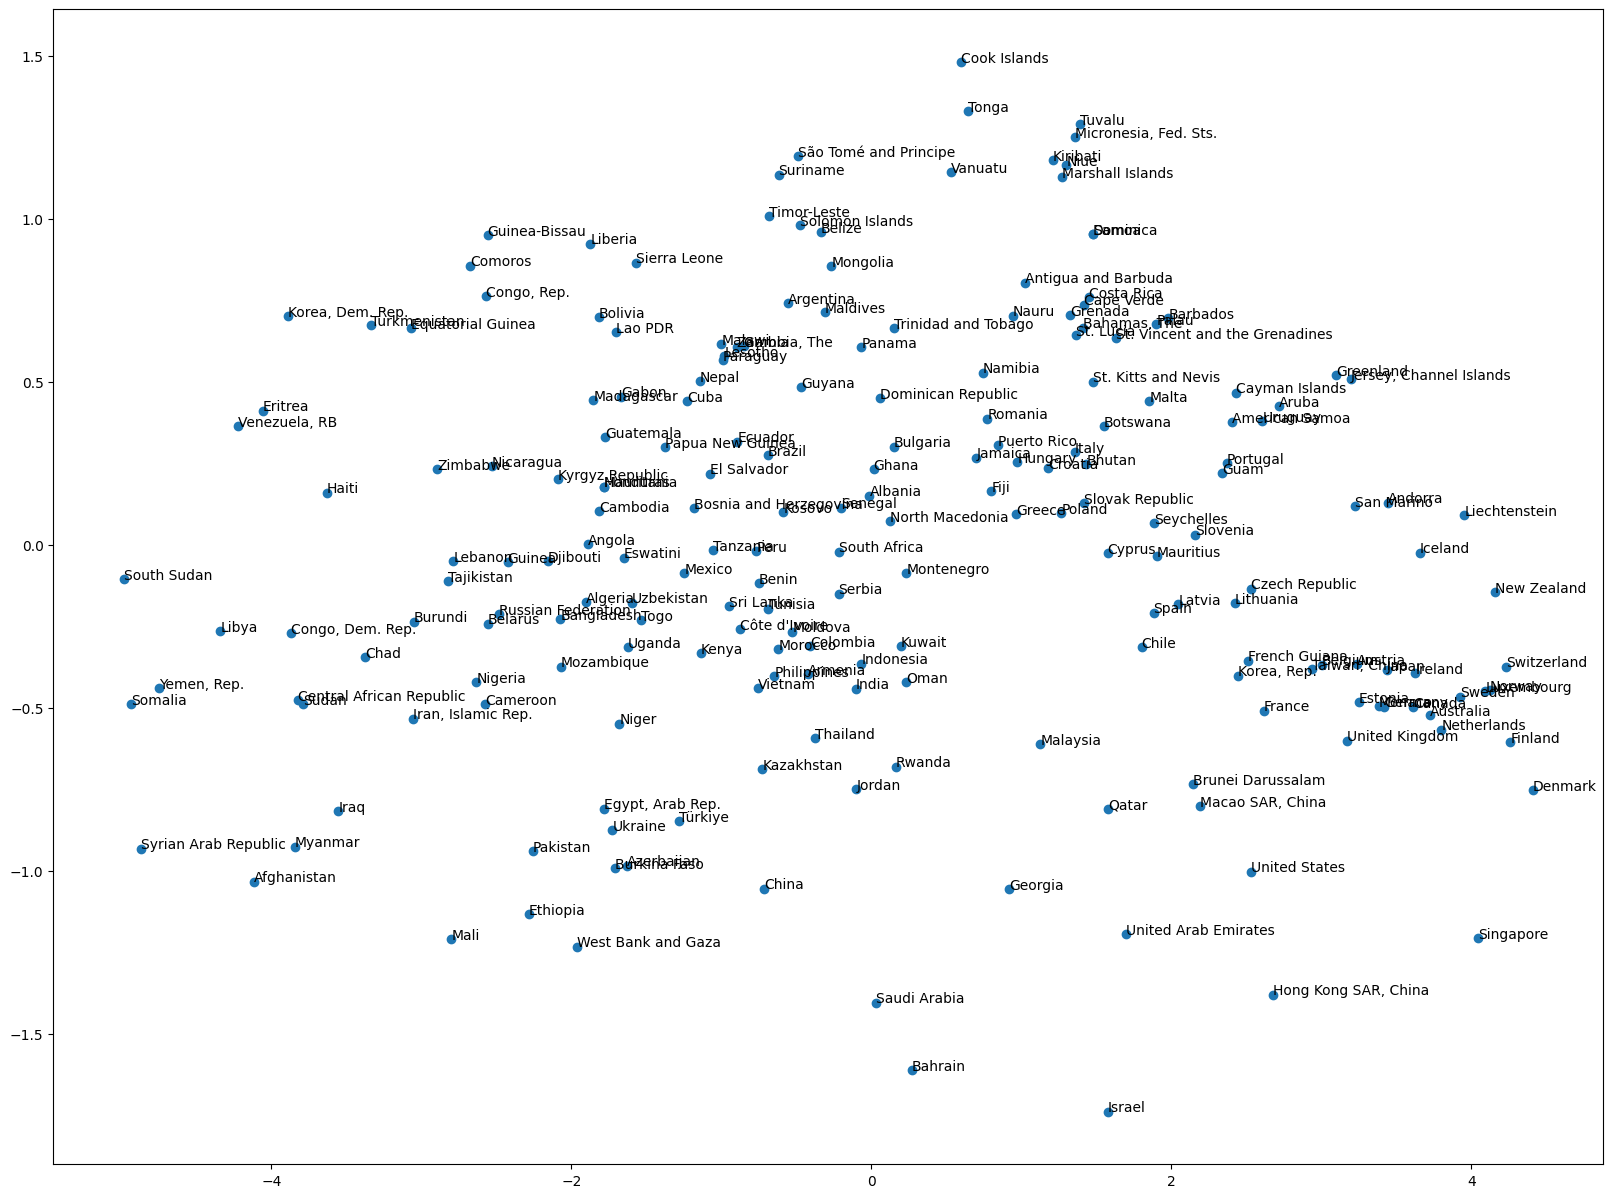

In [49]:
plt.rcParams["figure.figsize"] = [20, 15]
plt.scatter("dim1","dim2", data=df_acp)
for i,j,nom in zip(df_acp["dim1"], df_acp["dim2"], df_acp["pays"]):
    plt.text(i,j,nom)

On voit sur le graphe que les pays d'un même continent sont regroupés assez proches les uns des autres. Il pourrait être judicieux de refaire le même graphe avec un code couleur par continent. Problème: cette information ne figure pas dans la base. Pour récupérer cette variable, plusieurs moyens existent:
* utiliser chatGPT (attention aux erreurs!)
* chercher des packages qui permettent de le faire

Ce type de traitement de données peut prendre beaucoup de temps à régler, il ne faut donc pas hésiter à essayer les outils comme ChatGPT ou Bard qui peuvent trouver des solutions rapidement. La dernière version de ChatGPT peut lire des fichiers images, et donc traiter une base de données avec une simple capture d'écran. Attention toutefois: ce n'est pas un moteur de recherche mais un générateur de texte, les réponses proposées ne sont donc pas forcément vraies ou efficaces!

Nous allons utiliser la deuxième option, mais elle est un peu complexe. Il est nécessaire d'utiliser le package *pycountry* qui permet de transformer des codes pays en codes continents.

La difficulté dans notre base est que les noms des pays ne sont pas forcément identiques à ceux d'une autre base standard. Par exemple pour les Bahamas, le nom est "Bahamas, The". En joignant des bases, il est possible que le match ne soit pas détécté et que Python renvoit donc une erreur. Pour éviter cela, nous allons devoir retraiter traiter les noms de pays en amont. Une fois ceci fait, nous pouvons convertir les noms traités en codes ISO 3166-1 alpha-2 (norme internationale) et ensuite les matcher avec les continents correspondants. Certains packages permettaient de tout automatiser mais des conflits de versions les ont rendus inutilisables, il faut donc tout faire à la main! Beaucoup d'ennuis pour un simple graphique!



In [56]:
!pip install pycountry_convert
!pip install pycountry
import pycountry_convert as pc
import pycountry



In [65]:
import pycountry_convert as pc
import pycountry
import pandas as pd
import numpy as np

# Assume your data is in a CSV file named 'your_data.csv'
# Replace 'your_data.csv' with the actual file path
data_raw = pd.read_stata('/content/wgidataset.dta')

# Define a dictionary for country name replacements
country_replacements = {
    'Bahamas, The': 'Bahamas',
    'Congo, Rep.': 'Congo, The Democratic Republic of the',
    'Cape Verde': 'Cabo Verde',
    'Egypt, Arab Rep.': 'Egypt',
    'Micronesia, Fed. Sts.': 'Micronesia',
    'Gambia, The': 'Gambia',
    'Hong Kong SAR, China': 'Hong Kong',
    'Iran, Islamic Rep.': 'Iran',
    'Jersey, Channel Islands': 'Jersey',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis', # Changed to the official name
    'Korea, Rep.': 'South Korea',
    'Lao PDR': 'Lao',
    'Macao SAR, China': 'Macao',
    'St. Lucia': 'Saint Lucia',
    'Korea, Dem. Rep.': 'North Korea',
    'Türkiye': 'Turkey',
    'Taiwan, China': 'Taiwan',
    'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Venezuela, RB': 'Venezuela',
    'West Bank and Gaza': 'Palestine, State of',
    'Yemen, Rep.': 'Yemen',
    'Congo, Dem. Rep.': 'Congo, The Democratic Republic of the'
}

# Creating a new DataFrame called 'dft_id' to preserve the original 'data_raw'
dft_id = data_raw.copy()
# Apply the country name replacements to the 'countryname' column of the new DataFrame
# The column was named 'countryname' not 'pays'
dft_id['countryname'] = dft_id['countryname'].replace(country_replacements)


# Get country codes using pycountry
pays_codes = []
# Iterate through the 'countryname' column
for country_name in dft_id['countryname']:
    try:
        country = pycountry.countries.search_fuzzy(country_name)[0]
        pays_codes.append(country.alpha_2)
    except LookupError:
        print(f"Warning: Could not find country code for '{country_name}'")
        pays_codes.append(None)  # or handle the error differently

dft_id['pays_code'] = pays_codes

# Replace specific country codes if needed
code_replacements = {
    'TL': 'CN',
    'UM': 'US'
}
dft_id['pays_code'] = dft_id['pays_code'].replace(code_replacements)

# Get continent names using pycountry_convert
continent_names = []
for country_code in dft_id['pays_code']:
    try:
        continent_names.append(pc.country_alpha2_to_continent_code(country_code))
    except KeyError:  # Handle KeyError for invalid country codes
        print(f"Warning: Invalid country code '{country_code}'")
        continent_names.append(None)  # Or handle differently

dft_id['cont'] = continent_names

# Now you can use the updated dft_id DataFrame
print(dft_id.head())

  code countryname  year  vae  vas  van  var  val  vau  pve  ...  rll  rlu  \
0  ABW       Aruba  1996  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
1  ABW       Aruba  1998  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2  ABW       Aruba  2000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3  ABW       Aruba  2002  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4  ABW       Aruba  2003  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

   cce  ccs  ccn  ccr  ccl  ccu  pays_code  cont  
0  NaN  NaN  NaN  NaN  NaN  NaN         AW    NA  
1  NaN  NaN  NaN  NaN  NaN  NaN         AW    NA  
2  NaN  NaN  NaN  NaN  NaN  NaN         AW    NA  
3  NaN  NaN  NaN  NaN  NaN  NaN         AW    NA  
4  NaN  NaN  NaN  NaN  NaN  NaN         AW    NA  

[5 rows x 41 columns]


In [66]:
dft_id.head(100)

,code,countryname,year,vae,vas,van,var,val,vau,pve,...,rll,rlu,cce,ccs,ccn,ccr,ccl,ccu,pays_code,cont
0,ABW,Aruba,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AW,NA
1,ABW,Aruba,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AW,NA
2,ABW,Aruba,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AW,NA
3,ABW,Aruba,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AW,NA
4,ABW,Aruba,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AW,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AGO,Angola,2022,-0.797131,0.117145,13.0,26.570047,21.73913,31.884058,-0.646241,...,9.433962,23.584906,-0.601941,0.160003,10.0,30.660378,21.226416,43.396225,AO,AF
96,AIA,Anguilla,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AI,NA
97,AIA,Anguilla,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AI,NA
98,AIA,Anguilla,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AI,NA


Succès! On peut maintenant obtenir le graphe désiré. Tous les packages graphiques peuvent être utilisés, toutefois certains sont plus simples que d'autres à mettre e oeuvre. Nous allons utiliser le package *plotly.express*. Ce package permet de réaliser des graphiques interactifs. La fonction *scatter* permet de colorier des points selon les valeurs d'une variable qualitative simplement. Le rendu est de bonne qualité et s'affiche directement dans un navigateur internet (si vous codez sur un IDE) ou dans le notebook si vous codez via Jupyter.

Importez plotly.express et renommez le px, puis avec l'aide intégrée de Python et/ou une recherche sur votre moteur préféré, essayez de tracer le graphique souhaité. Pour adapter la taille des noms de pays, utilisez la méthode *update_traces(textfont_size=8)*

In [67]:
import plotly.express as px
fig = px.scatter()
fig.update_traces(textfont_size=8)
fig.show()

* 16) D'après les résultats de l'ACP, quelles analyses pouvez-vous faire du graphique ci-dessus?



## 1.4 Analyse temporelle

Il reste une dimension dans la base de données que nous n'exploitons pas: le temps. Chaque pays est observé annuellement et il peut être intéressant de voir comment cette évolution se retranscrit dans le plan de l'ACP. Pour cela, nous allons revenir à la base *data*, en faire une copie *data_pc* et calculer les coordonnées de toutes les observations dans le plan factoriel et les ajouter à *data_pc*. A partir des éléments vus dans le TP, essayez de le faire vous-mêmes et de résoudre les éventuels problèmes.


Une fois la base *data_pc* construite, choisissez plusieurs pays aparaissant proches sur le graphique précédents et créez pour chacun une base contenant les observations de ce pays.


In [ ]:
data_pc=



Une fois ces bases obtenues, il nous reste à construire un graphique rendant compte de l'évolution dans le temps de leurs coordonnées dans le plan factoriel. Pour cela, créez un graphe matplotlib traçant les coordonnées de chacun des pays choisis en utilisant une couleur différente par pays. Assurez-vous que chaque courbe possède un label et entrez la commande *plt.legend()* pour afficher une légende automatiquement.

Pour que le graphique soit plus clair à lire, il est possible d'ajouter les années à côté de chaque point traçé, là encore avec une boucle *for* itérée sur les tuples $(dim1,dim2,year)$.

Pour obtenir des effets visuels plus complexes, *matplotlib* inclut un sous-module *patheffects* qui offre de nombreuses options.

Le rendu de Matplotlib est correct mais pas très élégant et surtout peu lisible si on a beaucoup de pays à étudier. Pour des données temporelles, le package *plotly.express* permet d'obtenir des rendus animés de bien meilleure qualité. Pour cela, il suffit de préciser dans la fonction *px.scatter* une variable "animation_frame=" qui renseigne l'échelle de temps, et une variable "animation_group=" qui renseigne comment regrouper les données (ici, par pays).

In [ ]:
px.scatter()

* 17: Quelles conclusions tirez vous de l'ACP? Quels modèles alternatifs utiliseriez-vous pour aller plus loin?

## Partie 2: Analyse des correspondances multiples

### 2.1: Préparation des données

Nous allons maintenant mettre en oeuvre l'analyse des correspondances multiples sur une base de données disponible sur [Kaggle](https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer) intitulée Lungcancer. Elle contient des réponses individuelles à un questionnaire qualitatif qui contient les informations suivantes:
* Sexe du patient
* Âge du patient
* Fumeur?
* Doigts jaunis
* Anxiété ?
* Stress ?
* Présence d'une maladie chronique
* Fatigue ?
* Présence d'allergies
* Obstructions respiratoires
* Consommation d'alcool
* Présence de toux chronique
* Essouflement
* Difficultés de déglutition
* Présence de douleurs à la poitrine
* Présence d'un cancer du poumon


A l'exception de l'âge des patients, toutes ces variables sont qualitatives binaires. On se propose d'étudier la structure des corrélations entre modalités pour voir comment celles-ci ont un impact sur la potentielle présence d'un cancer du poumon.

Pour commencer, importez le fichier de données "survey lung cancer.csv" avec la fonction *read_csv* de Pandas dans une base nommée *data_lc*. Au besoin, reprécisez le chemin d'accès avant via la fonction *os.chdir*. Vérifiez avec la méthode *head()* que le fichier a été correctement importé.


In [ ]:
data_lc=pd.read_csv()

Avant de pouvoir calculer une ACM, il va falloir mettre au propre les données. Pour cela, nous allons devoir:
* Requalifier les variables d'intérêt en variables qualitatives avec la fonction *pd.categorical()*
* Renommer les modalités "1" et "2" en "Non" et "Oui" avec la méthode *cat.rename_categories()*
* Transformer la variable "AGE" en variable qualitative avec la fonction *pd.qcut()* en la découpant en 3 classes d'âge.

En utilisant l'aide intégrée sur chacune de ces commandes, effectuez le prétraitement des données dans la cellule ci-dessous. Vous pouvez faire une boucle itérant sur les colonnes.

In [ ]:
for col in data_lc.columns:


Avant d'entammer les analyses, on peut effectuer quelques analyses descriptives. Par exemple, tracez un histogramme comparé de l'âge des répondants selon qu'ils aient un cancer du poumon ou non. Pour cela, utilisez la fonction *histplot* de Seaborn.

In [ ]:
sb.histplot()

* 18: Quelle interprétation pouvez-vous faire du graphique précédent?

### 2.2: Calcul de l'ACM

Pour calculer une ACM, nous allons utiliser le package *mca* car ScikitLearn ne contient pas de fonctions le faisant naturellement. Installez le package via la commande "!pip install mca" si besoin, puis importez la fonction MCA de ce package.

Pour pouvoir estimer l'ACM, il faut construire le tableau disjonctif complet. Pour cela, créez une base *data_q* ne contenant que des données qualitatives. Ensuite, lisez la documentation de la fonction *pd.get_dummies*.

Cette fonction prend en entrée une base de données et renvoit un vecteur numpy. Pour transformer ce dernier en base au format DataFrame, il faut utiliser la fonction *pd.DataFrame*.

Construisez le tableau disjonctif complet en le nommant *tdc* et vérifiez qu'il contient bien les données souhaitées avec la méthode *head()*.

In [ ]:
pd.get_dummies?


Nous pouvons désormais calculer l'ACM en appliquant à la base *tdc* la fonction *MCA*. En utilisant l'aide intégrée si besoin, calculez l'acm dans une variable appelée mca_lc, en précisant l'option "benzecri=False".

Le module MCA diffère un peu de l'ACP: chaque package fonctionne différemment, même si les méthodes sont identiques. Pour obtenir les résultats, on utilise les commandes suivantes:
* mca_lc.L permet d'obtenir les valeurs propres
* mca_lc.fs_c() permet d'obtenir les coordonnées des modalités
* mca_lc.fs_r() permet d'obtenir les coordonées des individus

Tous les résultats sont au format numpy. Une documentation complète figure [ici](https://github.com/esafak/mca/blob/master/docs/usage.rst). Dans la cellule ci-dessous, affichez les valeurs propres et tracez le graphique d'éboulis.

* 19: quelle interprétation faites-vous du graphique précédent? Y a-t-il une forte structure dans les données?

### 2.3: Interprétation et visualisation des résultats

Nous allons nous concentrer sur les deux premiers axes principaux et tracer les modalités dans ce plan. Tracez un scatterplot à l'aide du package de votre choix en y faisant figurer le nom des modalités.

In [ ]:
plt.scatter()

* 20: A partir du graphique précédent, quelle interprétation faites-vous des axes de l'ACM? Sont ils informatifs pour comprendre les déterminants du cancer du poumon?